In [35]:
import cv2
import os
import sys

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

sys.path.append('..')
import data
import model
import utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
params = utils.yaml_to_dict('../config.yml')
params['data_dir_images'] = os.path.join('..', params['data_dir_images'])
params['data_dir'] = os.path.join('..', params['data_dir'])
params['model_dir'] = os.path.join('..', params['model_dir'])

In [32]:
id_label_map = utils.load_id_label_map(params)

In [7]:
model_names = sorted([
    name for name in os.listdir(params['model_dir'])
    if name.startswith('model.ckpt') and name.endswith('.meta')
], key=lambda x: x.split('-')[1])

newest_model = model_names[-1][:-5]
newest_model

'model.ckpt-30000'

In [8]:
model_path = os.path.join(params['model_dir'], newest_model)

In [19]:
estimator = tf.estimator.Estimator(
    model_fn=model.model_fn,
    model_dir=params['model_dir'],
    params=params,
    warm_start_from=model_path
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '..\\checkpoints', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026F9E5E2E48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [44]:
def plot_results(dataset,label):
    fig, axis = plt.subplots(5,5, figsize=(20,20))
    for i in range(5):
        for j in range(5):

            img_indice = np.random.randint(len(dataset))
            img = cv2.imread(dataset[img_indice][0])[..., ::-1]

            title = id_label_map[label[img_indice]]

            axis[i][j].set_title(title)
            axis[i][j].imshow(img)
            axis[i][j].get_xaxis().set_visible(False)
            axis[i][j].get_yaxis().set_visible(False)
    plt.show()

In [47]:
def make_predictions(dataset, params):
    
    predictions = estimator.predict(
        input_fn = lambda: data.input_fn(sources=dataset, train=False, params=params)
    )
    
    classes = []
    probabilities = []
    for i in predictions:
        classes.append(i['classes'])
        probabilities.append(i['probabilities'])
        
    return classes,probabilities

# Predictions and Metrics in Training and Validation set

In [48]:
training_ds = data._sources(params=params,mode='training')
validation_ds = data._sources(params=params,mode='validation')

In [49]:
training_classes, _ = make_predictions(training_ds, params)
validation_classes, _ = make_predictions(validation_ds, params)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ..\checkpoints\model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ..\checkpoints\model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


## Training Results

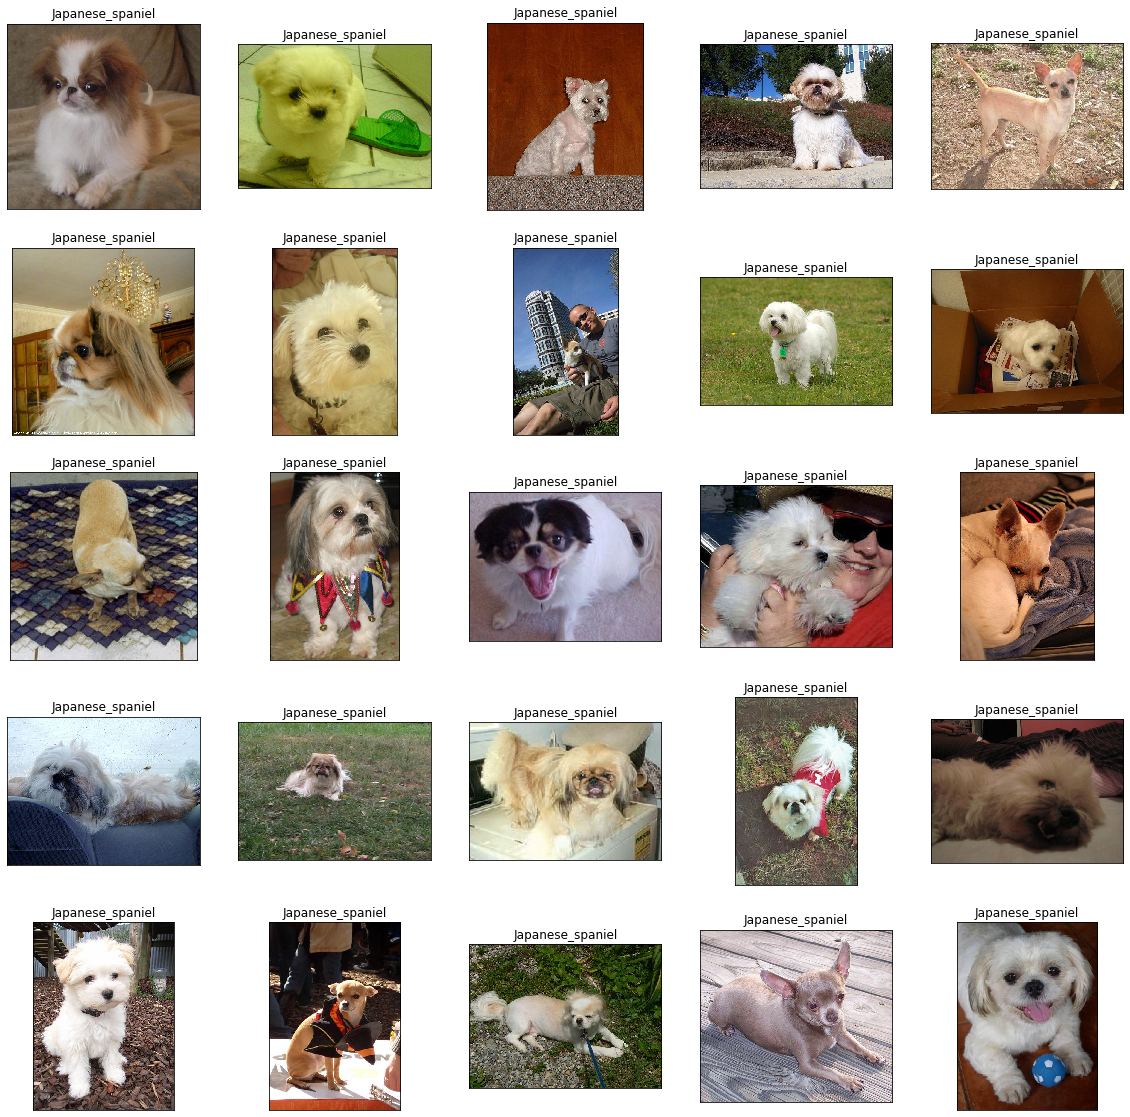

In [52]:
plot_results(training_ds,training_classes)

## Validation Results

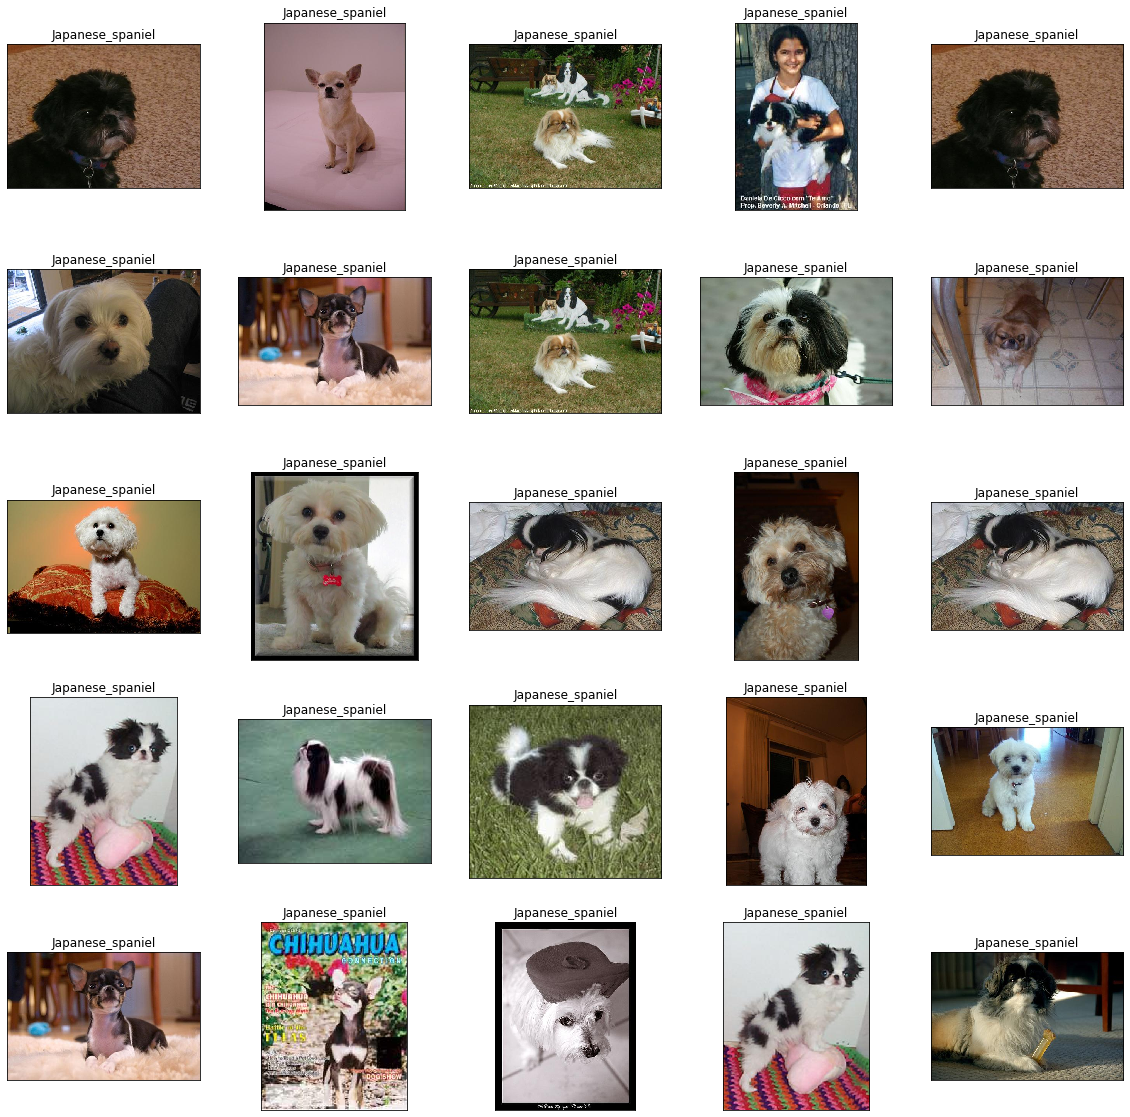

In [53]:
plot_results(validation_ds,validation_classes)

# Predictions in Test Set

In [55]:
test_ds = data._sources(params=params,mode='test')

In [ ]:
test_classes, _ = make_predictions(training_ds, params)

INFO:tensorflow:Calling model_fn.


In [54]:
plot_results(test_ds,test_classes)

NameError: name 'test_classes' is not defined